# Segmentação de imagens por cor

Primeiramente vamos relembrar o Modelo de Cores RGB. A Figura abaixo mostra o cubo de cores RGB, onde cada vértice representa uma cor pura e cada face representa uma cor secundária.

![](img/rgb_cube.png)

# Mascaramento

Forma de segmentação onde uma imagem binária (pixels preto e branco) é criada a partir da imagem original, colorida ou tons de cinza, para indicar os pixels de interesse e seprá-los dos pixels de fundo. No OpenCV essa imagem binária, chamada de máscara ou *mask*, é representada através de uma imagem em tons de cinza convencional, onde o valor preto `0` indica pixel de fundo e o valor branco `255` é usado para indicar o pixel de interesse.

Por exemplo vamos tentar marcar as diferentes cores em uma máscara, para isso vamos usar a imagem [cores.jpg](img/cores.jpg).

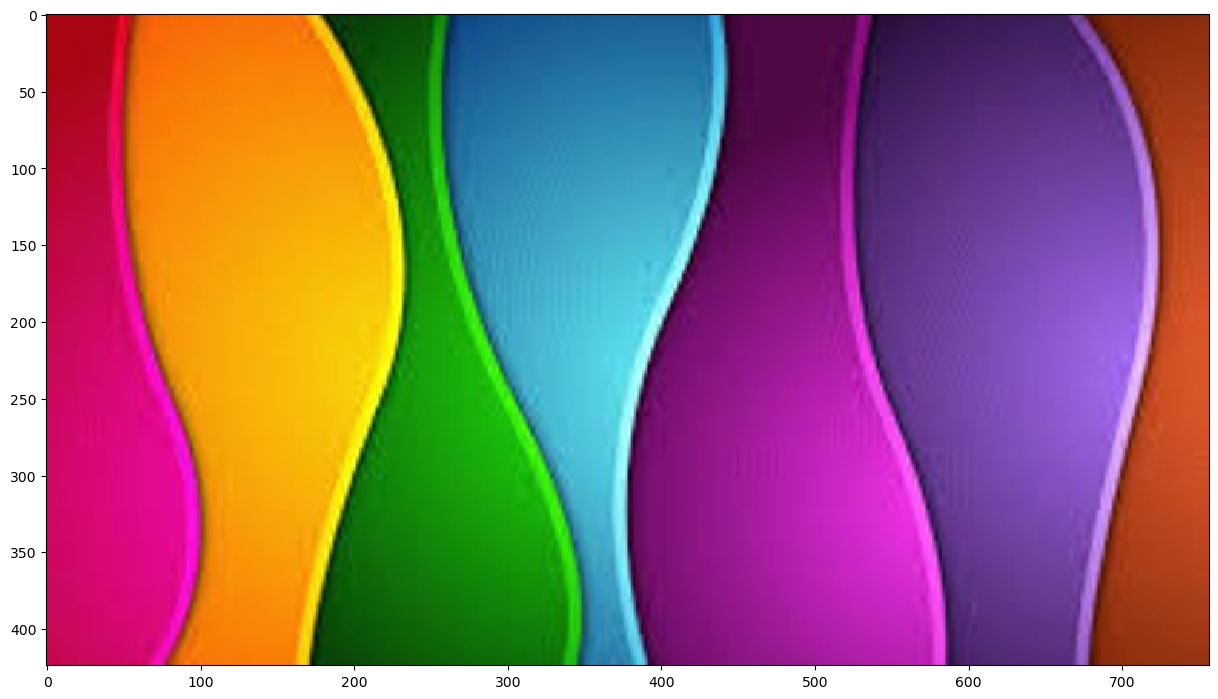

In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [15, 15]

# Já invertendo os canais
cores_rgb = cv2.imread("img/cores.jpg")[:,:,::-1]
plt.imshow(cores_rgb)
plt.show()


## Histograma
Vamos visualizar o histograma da imagem para ver como estão distribuídos os pixels dentro dos possíveis valores de intensidade, que no caso é de 0 a 255.

### Canal Vermelho

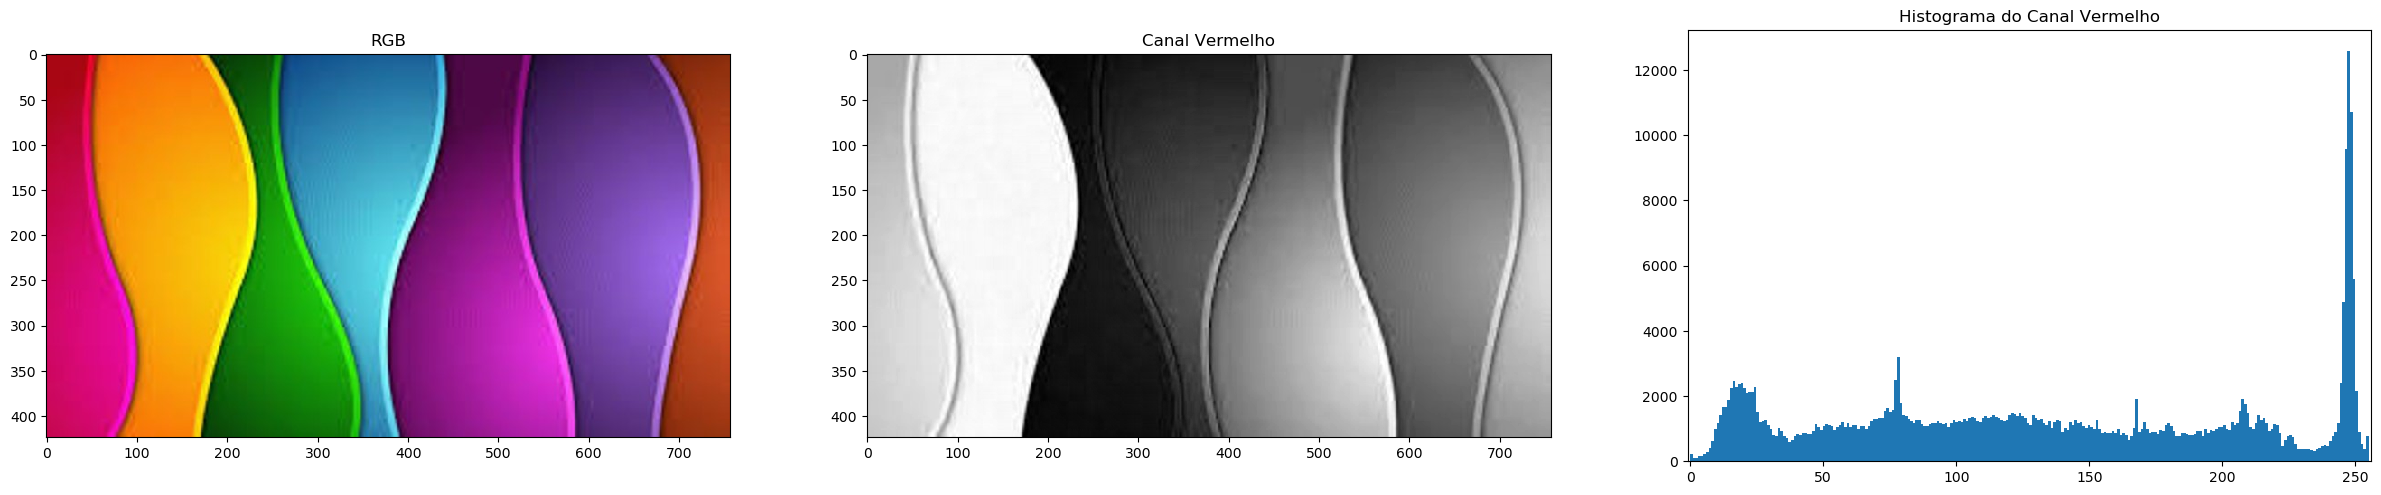

In [11]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Vermelho**
plt.subplot(1,3,2)
plt.title("Canal Vermelho")
cores_r = cores_rgb[:,:,0]
plt.imshow(cores_r, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Vermelho")
plt.hist(cores_r.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

### Canal Verde

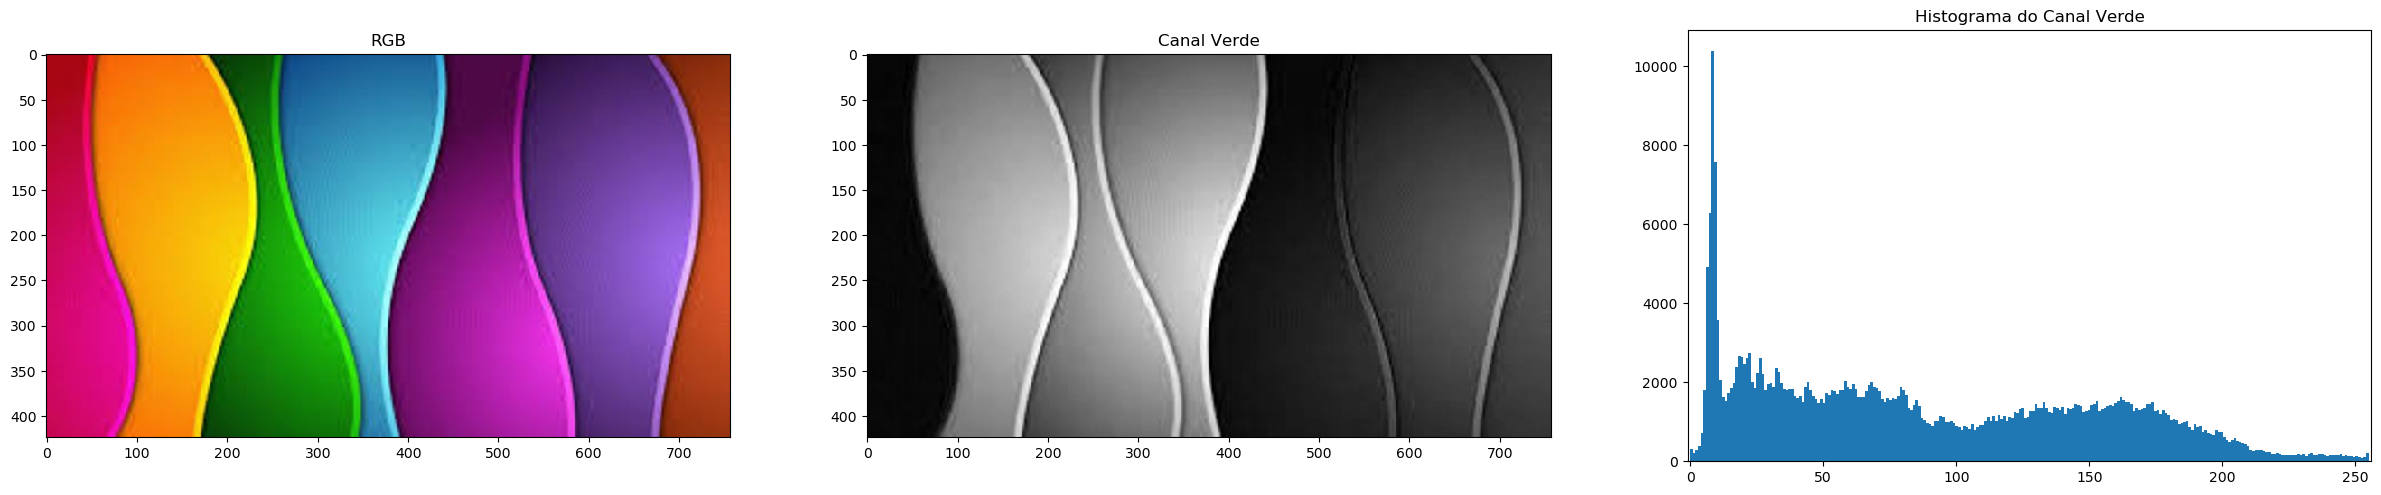

In [12]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Verde**
plt.subplot(1,3,2)
plt.title("Canal Verde")
cores_g = cores_rgb[:,:,1]
plt.imshow(cores_g, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Verde")
plt.hist(cores_g.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

### Canal Azul

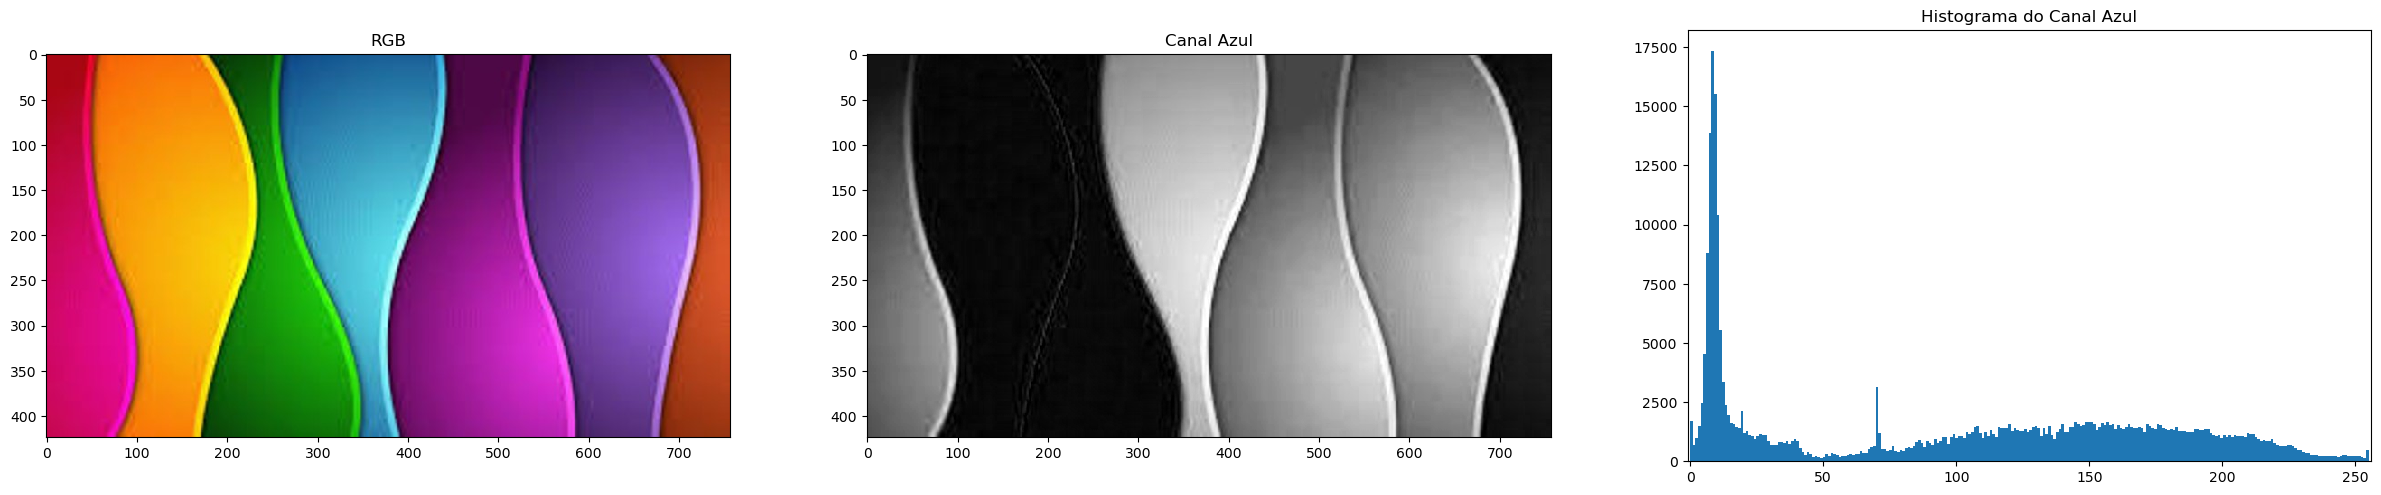

In [13]:
height, width, _ = cores_rgb.shape
plt.figure(figsize=(30, height / width * 10))  # para melhor visualização do histograma

plt.subplot(1,3,1)
plt.title("RGB")
plt.imshow(cores_rgb, cmap='gray')

# **Canal Azul**
plt.subplot(1,3,2)
plt.title("Canal Azul")
cores_b = cores_rgb[:,:,2]
plt.imshow(cores_b, cmap='gray')

plt.subplot(1,3,3)
plt.title("Histograma do Canal Azul")
plt.hist(cores_b.flatten(), bins=256)
plt.xlim([-1,256]) # para melhor visualização do histograma
plt.show()

# Filtrar Verde
Vamos agora identificar pixels da **cor verde**.

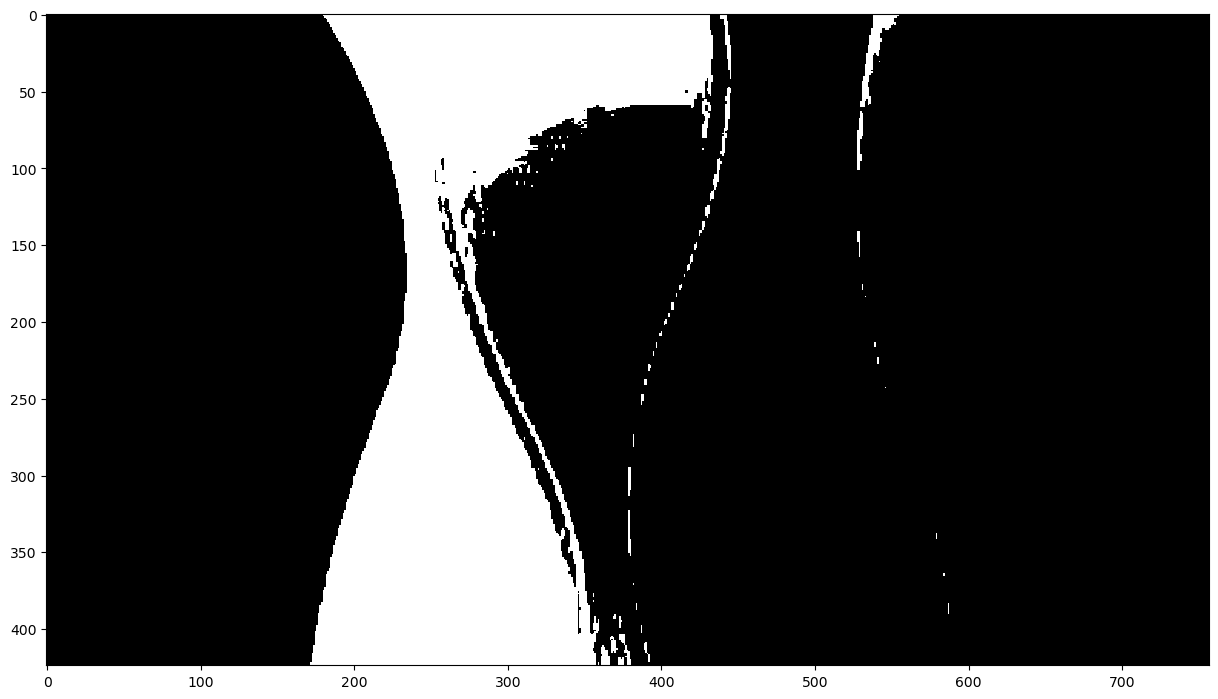

In [16]:
# Cria uma imagem 'zerada' com as mesmas dimensões de 'cores_r'
mask_red = np.zeros_like(cores_r)
mask_red[cores_r < 45] = 255

plt.imshow(mask_red, cmap='gray')
plt.show()

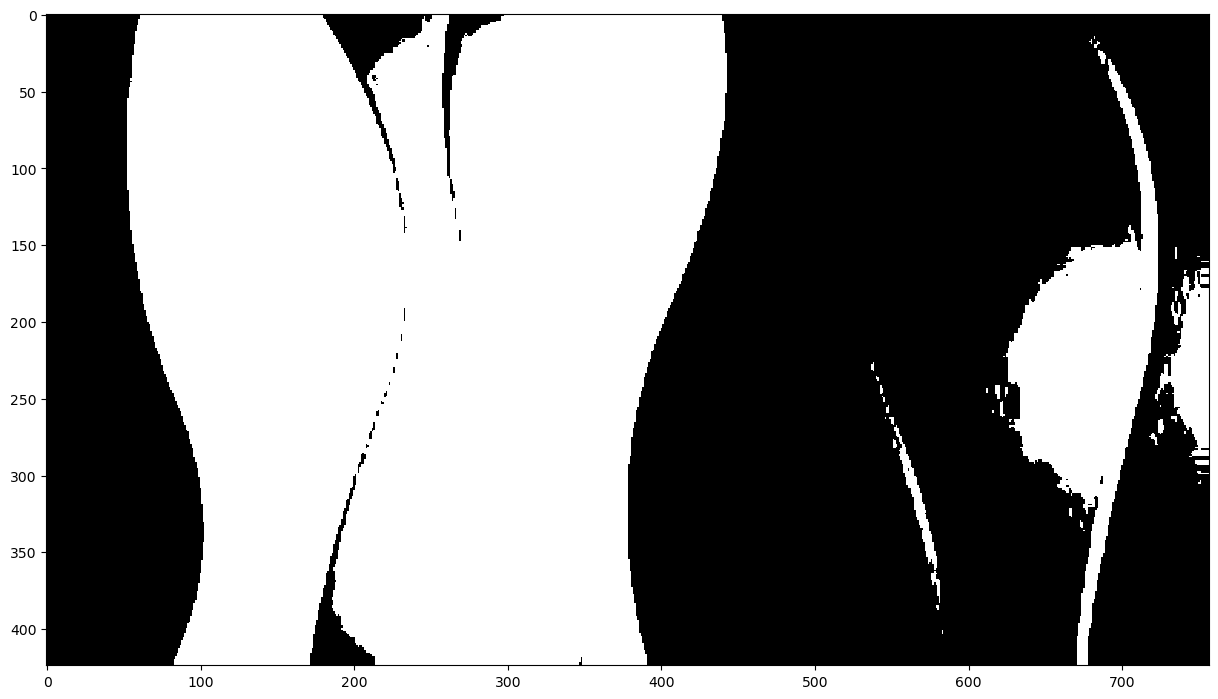

In [17]:
mask_green = np.zeros_like(cores_g)
mask_green[cores_g > 80] = 255

plt.imshow(mask_green, cmap='gray')
plt.show()

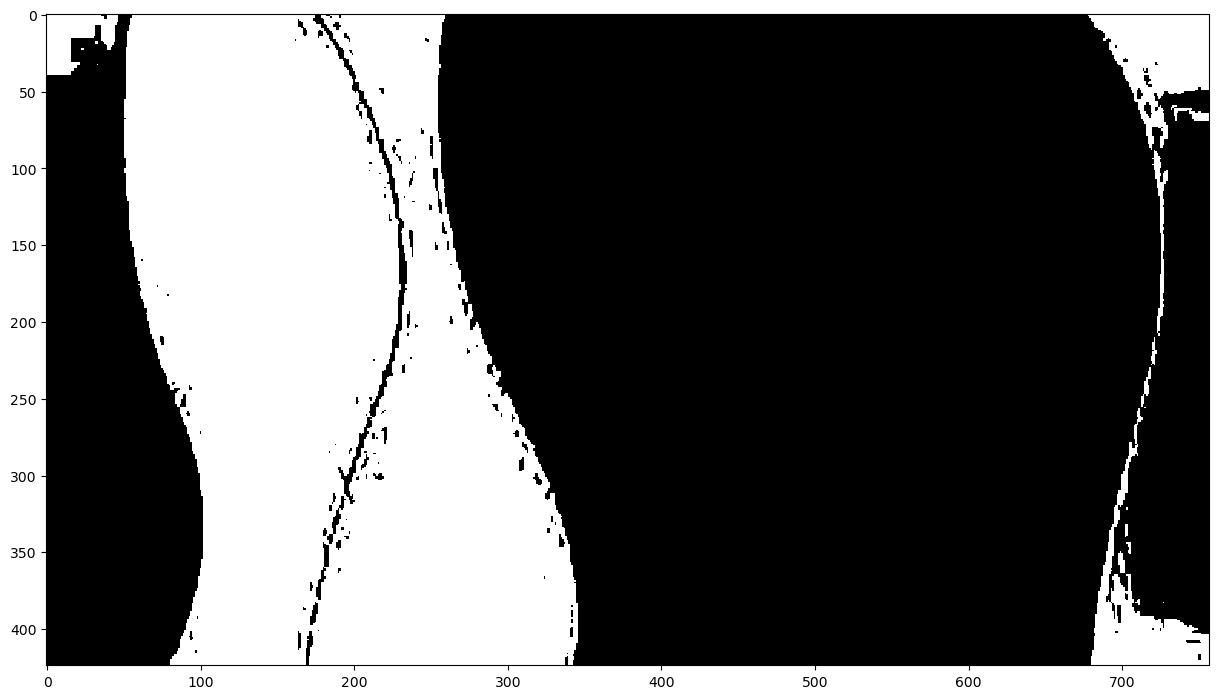

In [18]:
mask_blue = np.zeros_like(cores_b)
mask_blue[cores_b < 20] = 255

plt.imshow(mask_blue, cmap='gray')
plt.show()

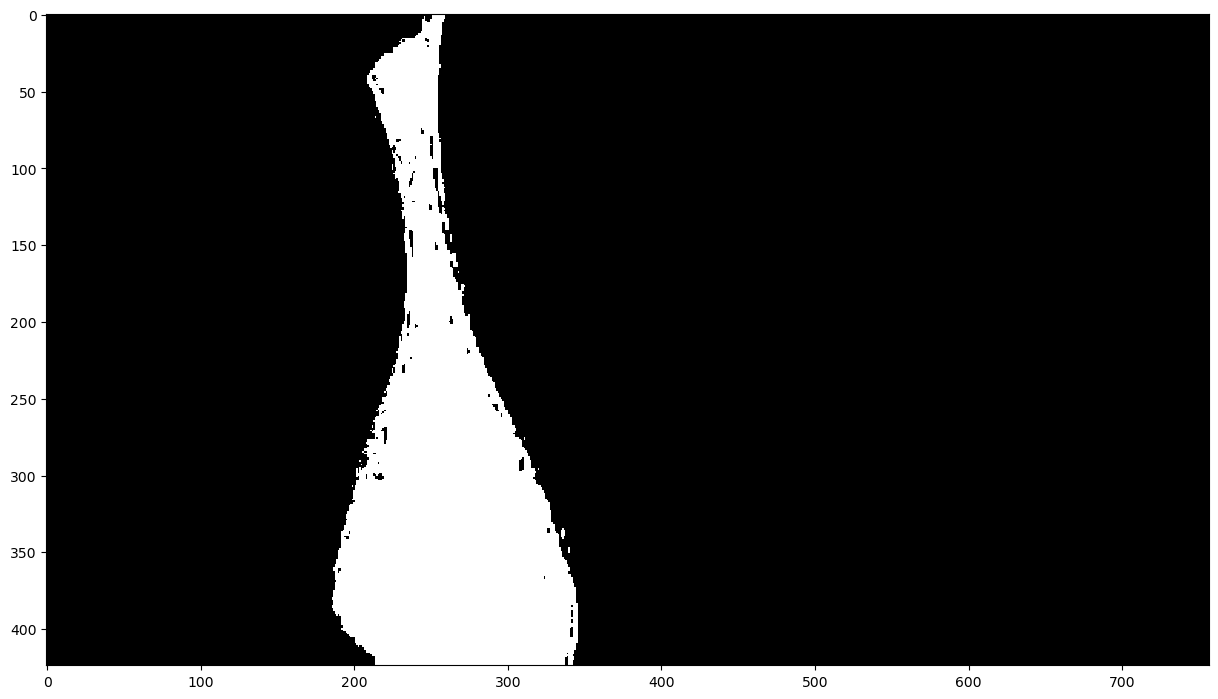

In [19]:
mask = cv2.bitwise_and(mask_blue, mask_red, mask=mask_green)
plt.imshow(mask, cmap='gray')
plt.show()

## Prática

**Exercício 1**: crie uma máscara para identificar a faixa amarela na imagem. Você pode precisar olhar para mais de um canal ;)

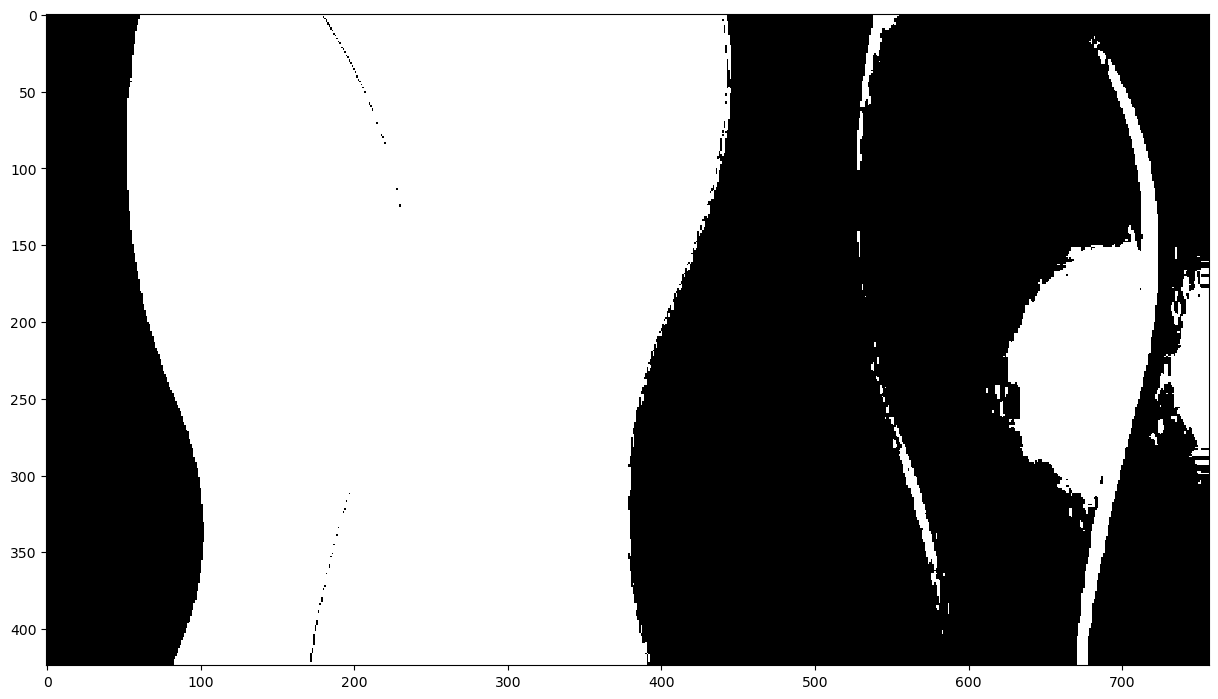

In [25]:
mask_yellow = np.zeros_like(cores_r)
mask_yellow[(cores_r < 45)] = 255
mask_yellow[(cores_g > 80)] = 255

plt.imshow(mask_yellow, cmap='gray')
plt.show()

**Exercício 2**: crie uma máscara para identificar as faixas roxa e rosa na imagem. Você pode precisar olhar para mais de um canal ;)